<a href="https://colab.research.google.com/github/tayfununal/machine_learning/blob/main/introduction/example_of_polynomial_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bishops Book**

##**Introduction**

###**Example: Polynomial Curve Fitting**

<center>x$\in[0,1] \quad and \quad f(x) = sin(2\pi x)$.</center>

The graph of the f is the following:

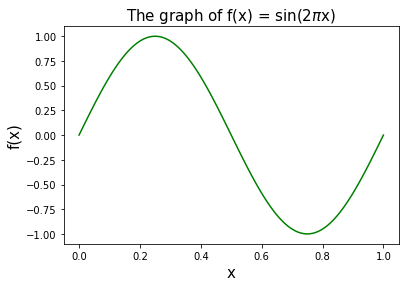

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_100 = np.linspace(0,1,100)

def f(x):
  return np.sin(2*np.pi*x)

y = f(x_100)

plt.plot(x_100, y, color="green")
plt.xlabel("x", fontsize=15)
plt.ylabel("f(x)", fontsize=15)
plt.title("The graph of f(x) = sin(2$\pi$x)", fontsize=15)
plt.show()

Then we need a dataset. For this, we define a $noisy_f$ function that currupt to f(x).
<center>$noisy_f(x) = f(x) + \mathcal{N}(\mu=0,\sigma=0.25)$</center>

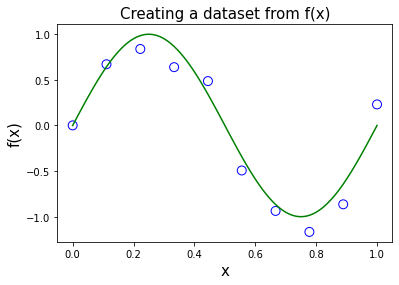

In [2]:
# f for 10 points
x_10 = np.linspace(0,1,10)

def noisy_f(x:np.ndarray, scale=0.25):
  return f(x) + np.random.normal(loc=0, scale=scale, size=x.shape)

noisy_y = noisy_f(x_10)
plt.scatter(x_10, noisy_y, s=80, facecolors='none', edgecolors='blue')
plt.plot(x_100, y, color="green")
plt.xlabel("x", fontsize=15)
plt.ylabel("f(x)", fontsize=15)
plt.title("Creating a dataset from f(x)", fontsize=15)
plt.show()

After that we get the dataset as the following:
<center>
  \begin{align}
    dataset = \begin{bmatrix}
                      x_1 & y_1 \\
                      x_2 & y_2 \\
                      \vdots & \vdots \\
                      x_N & y_N
              \end{bmatrix}
    \quad, \quad y_i=noisy_f(x_i) \quad for \quad i=1,2,…,N
  \end{align}
</center>

In [3]:
number_of_data = x_10.shape[0] # number is 10 here

dataset = np.concatenate((x_10.reshape(number_of_data,1), noisy_y.reshape(number_of_data,1)), axis=1)
dataset

array([[ 0.00000000e+00,  9.11833507e-04],
       [ 1.11111111e-01,  6.70835060e-01],
       [ 2.22222222e-01,  8.38413904e-01],
       [ 3.33333333e-01,  6.39063548e-01],
       [ 4.44444444e-01,  4.86397906e-01],
       [ 5.55555556e-01, -4.93384159e-01],
       [ 6.66666667e-01, -9.36760977e-01],
       [ 7.77777778e-01, -1.16682137e+00],
       [ 8.88888889e-01, -8.64152676e-01],
       [ 1.00000000e+00,  2.30745913e-01]])

For the purpose of the curve fitting, we create a $approx_f$ to approximation of $f(x)= sin(2\pi x)$

<center>
  \begin{align}
    approx_f(x,w) &= w_0+ w_1x^1+w_2x^2+ ⋯+w_Mx^M \\
    &= \sum_{i=0}^{M} w_ix^i
  \end{align}
</center>

And then the error function called $E[\mathbf{w^*}]$ is the following:
<center>
  \begin{align}
    E[\mathbf{w^*}] &= \frac{1}{2} \sum_{i=1}^N [f(x_i,w^*)-y_i]^2 \\
                    &= \frac{1}{2}\Bigg{\{}
                        \begin{bmatrix}
                            1 & x_1 & x_1^2 & \cdots & x_1^M\\
                            1 & x_2 & x_2^2 & \cdots & x_2^M\\
                            \vdots & \vdots & \vdots & \ddots & \vdots\\
                            1 & x_N & x_N^2 & \cdots & x_1^M
                        \end{bmatrix}
                        \begin{bmatrix}
                          w_0 \\
                          w_1 \\
                          \vdots \\
                          w_M
                        \end{bmatrix} - 
                        \begin{bmatrix}
                          y_1 \\
                          y_2 \\
                          \vdots \\
                          y_N
                        \end{bmatrix}
                        \Bigg{\}}^2 \\
                    &= \frac{1}{2} (\mathbf{Xw^*-t})^2
  \end{align}
</center>
We want to obtain appropriate $\mathbf{w^*}$ that makes $E[\mathbf{w^*}]$ minimum value. So, $E[\mathbf{w^*}]$ is a quadratic function it takes minimum value at $\mathbf{w^*}$ that provides $\nabla_w E[\mathbf{w^*}]=0$.

<center>
  \begin{align}
    \nabla_w E[\mathbf{w^*}]=0 \quad & \Rightarrow \quad \mathbf{Xw^*-t=0} \\
                                & \Rightarrow \quad \mathbf{Xw^*=t} \\
                                & \Rightarrow \quad \mathbf{X^TXw^*=X^Tt} \\
                                & \Rightarrow \quad \mathbf{(X^TX)^{-1}X^TXw^*=(X^TX)^{-1}X^Tt} \\
                                & \Rightarrow \quad \mathbf{Iw^* =(X^TX)^{-1}X^Tt}\\
                                & \Rightarrow \quad \mathbf{w^* =(X^TX)^{-1}X^Tt}
  \end{align}
</center>

In [4]:
def design_matrix(x, number_of_data, degree_of_polynomial):

  X = np.zeros((number_of_data,degree_of_polynomial))
  for i in range(number_of_data):
    X[i,:] = [x[i]**z for z in range(1,degree_of_polynomial +1)]

  plus_one = np.ones((x.shape[0],1))
  return np.concatenate((plus_one,X),axis=1)

degree_of_polynomial = 9

X = design_matrix(x_10, number_of_data,degree_of_polynomial)

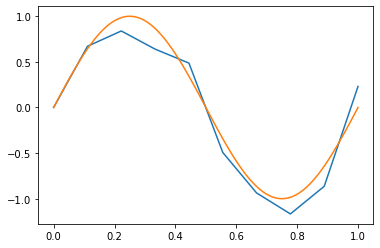

In [5]:
w_star = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),dataset[:,1].reshape(number_of_data,1))

plt.plot(x_10,np.matmul(X,w_star))
plt.plot(x_100,f(x_100))